In [1]:
import joblib
import numpy as np
import umap as umap
import pandas as pd
import matplotlib.pyplot as plt

/home/smestern/miniconda3/envs/database/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Load the data
data = joblib.load('dataset_numeric.pkl')
data['input_resistance'] = np.log10(data['input_resistance'].astype(float))
data["ap_1_width_0_long_square"] = np.log10(data["ap_1_width_0_long_square"]*1000)
#do the same for the tau
data["tau"] = np.log10(data["tau"]*1000)

In [9]:
#try to make a non-blobby umap
reducer = umap.UMAP(n_neighbors=150, min_dist=0.01, spread=1, metric='correlation')
embedding = reducer.fit_transform(data)


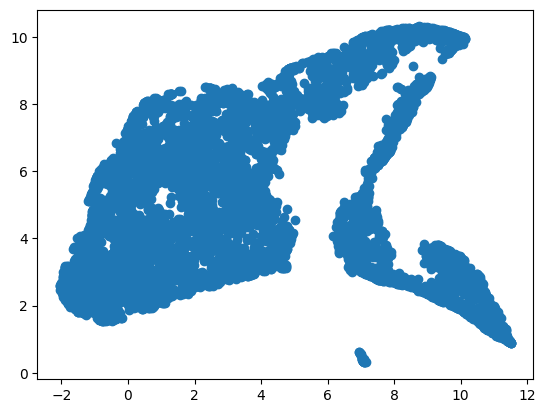

In [10]:
plt.plot(embedding[:,0], embedding[:,1], 'o')